## SI 670 Applied Machine Learning, Week 1:  A simple classification task (Due 09/14 11:59pm)

For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below). Then, try out the first one or two questions, which use basic numpy to prepare the data, so you can get familiar with the various columns, etc. Then use k-NN classifiers to learn and make predictions.

Each question is worth 20 points, for a total of 100 points. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

Submit your completed notebook file to the Canvas site - IMPORTANT: please name your submitted file si670-hw1-youruniqname.ipynb.

As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates: if you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.

### Put your name here: Martin Zanaj
### Put your uniquename here: mzanaj

In [22]:
# import required modules and load data file
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [23]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [24]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as manipulating data, so let's practice creating a classifier with a pandas DataFrame. 



Convert the sklearn.dataset `cancer` to a DataFrame. 

* This function should return a `(569, 31)` DataFrame with columns =  



    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

and index = 

    RangeIndex(start=0, stop=569, step=1)

In [25]:
def answer_one():
    #full dataset = predictors + target 
    d=pd.DataFrame(cancer.data) 
    d['target']= cancer.target
    col=cancer.feature_names.tolist()
    col.append('target')
    d.columns = col
    d.index = pd.RangeIndex(start=0, stop=569, step=1)
    return pd.DataFrame(d)

answer_one()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Question 2
Using `train_test_split`, split the dataset into training and test sets `(X_train, X_test, y_train, and y_test)`.

**Set the random number generator state to 670 using `random_state=670` to make sure your results match ours **

*This function should return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`*, where* 
* `X_train` *has shape* `(450, 30)`
* `X_test` *has shape* `(119, 30)`
* `y_train` *has shape* `(450,)`
* `y_test` *has shape* `(119,)`

In [26]:
from sklearn.model_selection import train_test_split

def answer_two():
    df = answer_one()
    
    #Get X & y (predictor space & response)
    X=df.drop(['target'],axis=1)
    y= df['target']
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=670,train_size=0.792)
    # print(X_train.shape)
    # print(X_test.shape)
    # print(y_train.shape)
    # print(y_test.shape)
    return X_train, X_test, y_train, y_test

answer_two()

(     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
 519       12.750         16.70  ...          0.3071                  0.08557
 289       11.370         18.89  ...          0.3267                  0.06994
 406       16.140         14.86  ...          0.2778                  0.07012
 272       21.750         20.99  ...          0.2833                  0.08858
 525        8.571         13.10  ...          0.2983                  0.10490
 ..           ...           ...  ...             ...                      ...
 151        8.219         20.70  ...          0.3322                  0.14860
 528       13.940         13.17  ...          0.2160                  0.07253
 364       13.400         16.95  ...          0.2741                  0.07582
 409       12.270         17.92  ...          0.3455                  0.06896
 562       15.220         30.62  ...          0.4089                  0.14090
 
 [450 rows x 30 columns],
      mean radius  mean texture  ...

### Question 3
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `n_neighbors = 5` on `X_train`, `y_train`. Then evaluate the classifier accuracy using `score` function on `X_test` and `y_test`.

*This function should return a tuple of (knn, accuracy), where*
* `knn` is a `sklearn.neighbors.classification.KNeighborsClassifier`
* `accuracy` is a `float` number returned by the `score` function

In [27]:
from sklearn.neighbors import KNeighborsClassifier

def answer_three():
    X_train, X_test, y_train, y_test = answer_two()
    #KNN
    knn= KNeighborsClassifier(n_neighbors= 5)
    knn.fit(X_train,y_train)
    accuracy = knn.score(X_test, y_test)
    return (knn, accuracy)


answer_three()

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'), 0.9327731092436975)

### Question 4
Recall in the fruits example in lab1, we found the feature scales matter. In this question, please examine the mean and standard deviation of `X_train`, and use the `sklearn.preprocessing.StandardScaler` to normalize the feature. Then train another knn (k=5) classifier and evaluate it.

*This function should return a tuple of (standardized_X_train, knn, accuracy), where*
* `standardized_X_train` is a `pandas.DataFrame` of the standardized features
* `knn` is a `sklearn.neighbors.classification.KNeighborsClassifier`
* `accuracy` is a `float` number returned by the `score` function


In [28]:
from sklearn.preprocessing import StandardScaler
def answer_four(k=5):
    X_train, X_test, y_train, y_test = answer_two()
  
    #We have some values that have quite large SD, this can lead to potential bad results (highest values will dominate over smaller ones influencing final fit ) 
    sd= np.std(X_train)
    sd=sd[sd>10]
    #print(sd1)
    ''' mean perimeter      24.096333
        mean area          345.605364
        area error          41.698021
        worst perimeter     33.600851
        worst area         575.154195 '''

    scaler = StandardScaler()
    columns = X_train.columns
    standardized_X_train = X_train.copy()
    standardized_X_test = X_test.copy()

    standardized_X_train[columns] = scaler.fit_transform(X_train[columns])
    standardized_X_test[columns] = scaler.transform(X_test[columns])

    knn=KNeighborsClassifier()
    knn.fit(standardized_X_train, y_train)

    accuracy = knn.score(standardized_X_test, y_test)

    return (standardized_X_train, knn, accuracy)  

answer_four()

(     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
 519    -0.350908     -0.594288  ...        0.243782                 0.054929
 289    -0.745705     -0.092213  ...        0.556914                -0.789683
 406     0.618920     -1.016123  ...       -0.224319                -0.779956
 272     2.223855      0.389229  ...       -0.136450                 0.217583
 525    -1.546456     -1.419617  ...        0.103192                 1.099480
 ..           ...           ...  ...             ...                      ...
 151    -1.647158      0.322745  ...        0.644783                 3.460934
 528    -0.010467     -1.403569  ...       -1.211645                -0.649725
 364    -0.164953     -0.536973  ...       -0.283431                -0.471940
 409    -0.488228     -0.314593  ...        0.857266                -0.842640
 562     0.355722      2.596985  ...        1.870153                 3.044842
 
 [450 rows x 30 columns],
 KNeighborsClassifier(algorithm='aut

### Question 5
Recall in the lecture and lab 1, we found the choice of k could affect the prediction accuracy. In this question, please train knn classifiers with `k = 1,2,...,20` and evaluate the classifiers by features normalized with `sklearn.preprocessing.StandardScaler` (similar to Question 4 with k changed). Next, please visualize how sensitive the k-NN classification accuracy is to the choice of the 'k' parameter by a scatter plot with the `x-axis` representing `k` and the `y-axis` representing `accuracy`.

* This function should get the accuracy under each k and store them in `accracy_list` for the scatter plot.


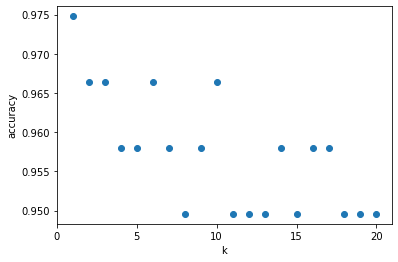

In [21]:
import matplotlib.pyplot as plt

def answer_five():
    k_range = range(1,21)
    accuracy_list = []
    
    for k in k_range:
      X_train, X_test, y_train, y_test = answer_two()
      scaler = StandardScaler()
      columns = X_train.columns
      standardized_X_train = X_train.copy()
      standardized_X_test =  X_test.copy()

      standardized_X_train[columns] = scaler.fit_transform(X_train[columns])
      standardized_X_test[columns] = scaler.transform(X_test[columns])

      knn=KNeighborsClassifier(n_neighbors=k)
      knn.fit(standardized_X_train, y_train)

      accuracy = knn.score(standardized_X_test, y_test)
      accuracy_list.append(accuracy)
    
    plt.figure()
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.scatter(k_range, accuracy_list)
    plt.xticks([0,5,10,15,20])

answer_five()